In [1]:
import os
import pickle
import time
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import preprocessing, model_selection
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [2]:
dataFile = '/scratch/anamikas/hyp/v2/tsvFile.tab'

In [3]:
dataFileDF = pd.read_csv(dataFile, sep="\t", names=['id', 'labeled-by', 'text', 'hyperpartisan', 'url', 'length', 'numURL'])

In [4]:
dataFileDF['hyperpartisan'].value_counts()

False    300407
True     300238
Name: hyperpartisan, dtype: int64

Almost Equal distribution of both classes

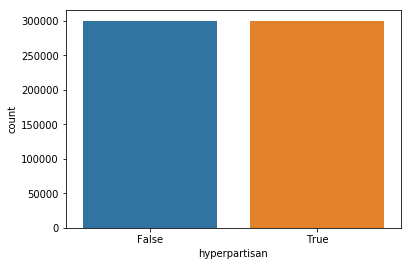

In [5]:
ax = sns.countplot(x="hyperpartisan", data=dataFileDF)

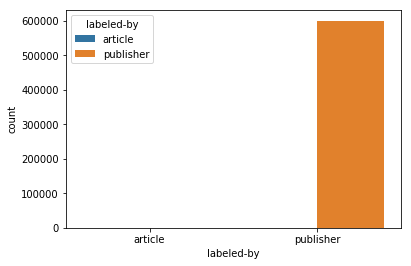

In [6]:
labels = sns.countplot(x="labeled-by",hue="labeled-by", data=dataFileDF)

Encoding the labels to integers

In [7]:
lbl_enc = preprocessing.LabelEncoder()
y = lbl_enc.fit_transform(dataFileDF.hyperpartisan.values)

In [8]:
xtrain, xvalid, ytrain, yvalid = train_test_split(dataFileDF.text.values, y,
                                                 stratify=y,
                                                 random_state=42,
                                                 test_size=0.1, shuffle=True)

In [9]:
print(xtrain.shape, ytrain.shape)

(540580,) (540580,)


In [10]:
print(xvalid.shape, yvalid.shape)

(60065,) (60065,)


TF-IDF

In [11]:
tfv = TfidfVectorizer(min_df=3, max_features=None,
                     strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}',
                     ngram_range=(1, 3), use_idf=1, smooth_idf=1, sublinear_tf=1,
                     stop_words='english')

In [ ]:
#fit and transform
start=time.time()
tfv.fit(list(xtrain) + list(xvalid))
end=time.time()